<a href="https://www.kaggle.com/code/khoatran311/quick-and-dirty-eda-with-polars?scriptVersionId=243772364" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import numpy as np
import pandas as pd
import polars as pl
import seaborn as sea
import polars.selectors as pls
import matplotlib.pyplot as plt
from scipy.stats import mannwhitneyu

import warnings
warnings.filterwarnings("ignore")

def format_pl():
    """FLOAT DISPLAY FORMATTING"""
    pl.Config.set_fmt_float("mixed")
    """STRING FORMATTING"""
    pl.Config.set_fmt_str_lengths(50)
    """TABLE FORMATTING"""
    pl.Config.set_tbl_rows(8)
    pl.Config.set_tbl_cols(15)
    pl.Config.set_tbl_width_chars(200)
    pl.Config.set_tbl_cell_alignment("RIGHT")
    pl.Config.set_tbl_hide_dtype_separator(True)
    pl.Config.set_tbl_hide_column_data_types(True)

format_pl()

# Train Data

In [2]:
train = pl.read_csv("/kaggle/input/cmi-detect-behavior-with-sensor-data/train.csv")

train.head()

row_id,sequence_type,sequence_id,sequence_counter,subject,orientation,behavior,…,tof_5_v57,tof_5_v58,tof_5_v59,tof_5_v60,tof_5_v61,tof_5_v62,tof_5_v63
"""SEQ_000007_000000""","""Target""","""SEQ_000007""",0,"""SUBJ_059520""","""Seated Lean Non Dom - FACE DOWN""","""Relaxes and moves hand to target location""",…,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
"""SEQ_000007_000001""","""Target""","""SEQ_000007""",1,"""SUBJ_059520""","""Seated Lean Non Dom - FACE DOWN""","""Relaxes and moves hand to target location""",…,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
"""SEQ_000007_000002""","""Target""","""SEQ_000007""",2,"""SUBJ_059520""","""Seated Lean Non Dom - FACE DOWN""","""Relaxes and moves hand to target location""",…,119.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
"""SEQ_000007_000003""","""Target""","""SEQ_000007""",3,"""SUBJ_059520""","""Seated Lean Non Dom - FACE DOWN""","""Relaxes and moves hand to target location""",…,111.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
"""SEQ_000007_000004""","""Target""","""SEQ_000007""",4,"""SUBJ_059520""","""Seated Lean Non Dom - FACE DOWN""","""Relaxes and moves hand to target location""",…,109.0,125.0,-1.0,-1.0,-1.0,-1.0,-1.0


## First Subset

In [3]:
subset1_features = ["sequence_id", "sequence_type", "sequence_counter", "subject", "phase", "gesture", "orientation", "behavior"]
sub1 = train.select(
    pl.col(subset1_features)
)

sub1.head(4)

sequence_id,sequence_type,sequence_counter,subject,phase,gesture,orientation,behavior
"""SEQ_000007""","""Target""",0,"""SUBJ_059520""","""Transition""","""Cheek - pinch skin""","""Seated Lean Non Dom - FACE DOWN""","""Relaxes and moves hand to target location"""
"""SEQ_000007""","""Target""",1,"""SUBJ_059520""","""Transition""","""Cheek - pinch skin""","""Seated Lean Non Dom - FACE DOWN""","""Relaxes and moves hand to target location"""
"""SEQ_000007""","""Target""",2,"""SUBJ_059520""","""Transition""","""Cheek - pinch skin""","""Seated Lean Non Dom - FACE DOWN""","""Relaxes and moves hand to target location"""
"""SEQ_000007""","""Target""",3,"""SUBJ_059520""","""Transition""","""Cheek - pinch skin""","""Seated Lean Non Dom - FACE DOWN""","""Relaxes and moves hand to target location"""


In [4]:
gesture_counts = sub1.group_by(
    pl.col("sequence_type"), pl.col("gesture")
).agg(
    pl.col("gesture").count().alias("count")
).sort(by="count", descending=True).to_pandas()

gesture_counts["pct"] = 100*gesture_counts["count"]/gesture_counts["count"].sum()

gesture_counts

,sequence_type,gesture,count,pct
0,Non-Target,Text on phone,58462,10.168277
1,Target,Neck - scratch,56619,9.847725
2,Target,Eyebrow - pull hair,44305,7.705954
3,Target,Forehead - scratch,40923,7.117724
4,Target,Forehead - pull hairline,40802,7.096679
5,Target,Above ear - pull hair,40560,7.054588
6,Target,Neck - pinch skin,40507,7.045370
7,Target,Eyelash - pull hair,40218,6.995104
8,Target,Cheek - pinch skin,40124,6.978754
9,Non-Target,Wave hello,34356,5.975528


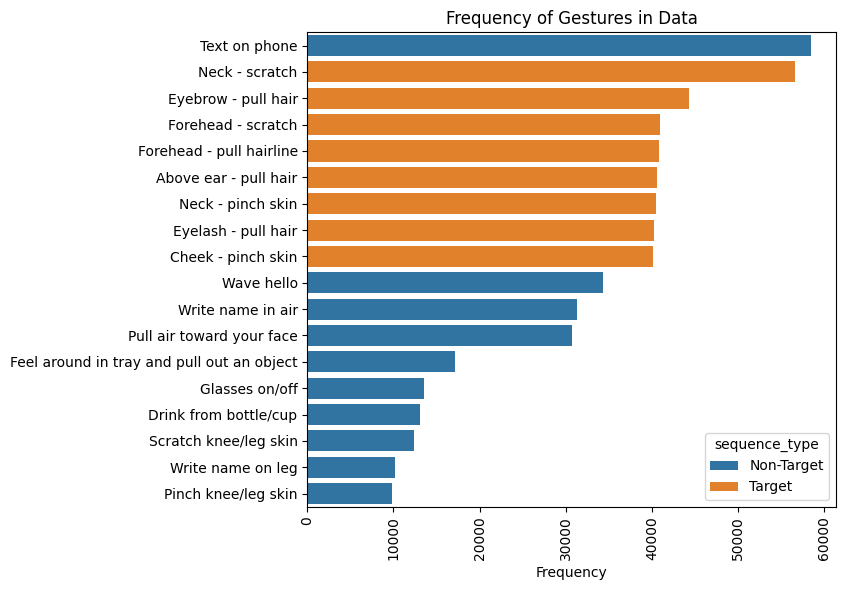

In [5]:
plt.figure(figsize=(14, 6))

plt.subplot(121)
sea.barplot(
    data=gesture_counts,
    y="gesture",
    x="count",
    hue="sequence_type",
    dodge=False
)
plt.xticks(rotation=90)
plt.title("Frequency of Gestures in Data")
plt.xlabel("Frequency")
plt.ylabel("")

plt.tight_layout()
plt.show()

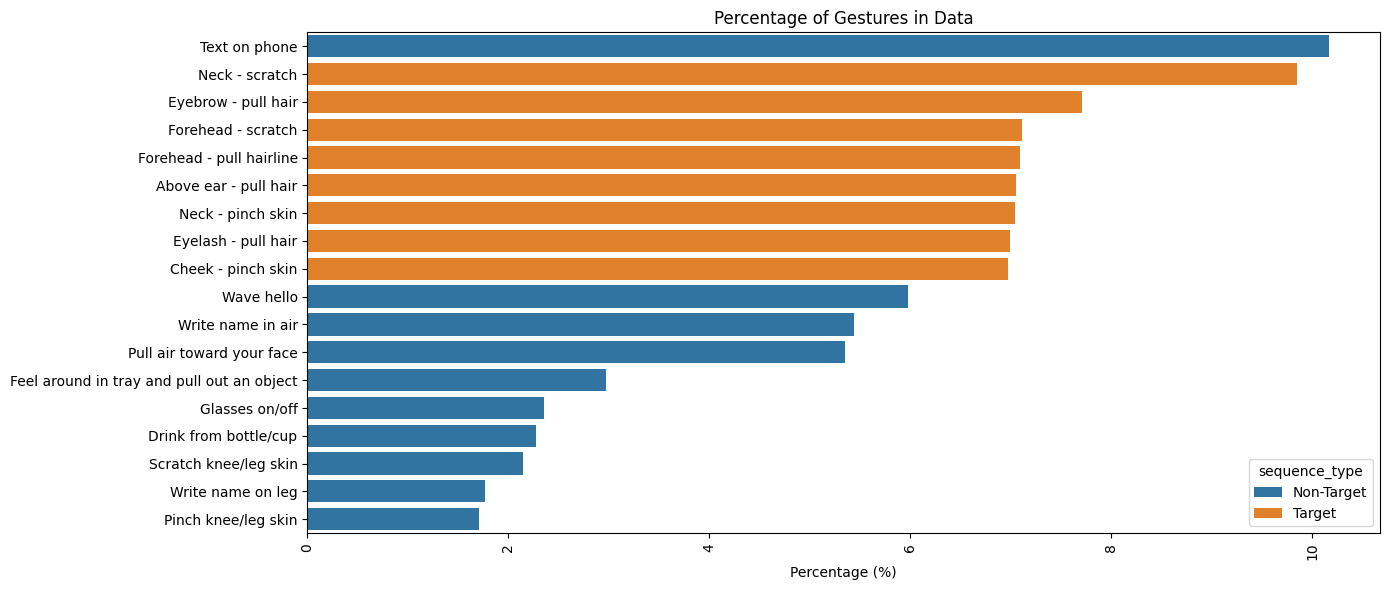

In [6]:
plt.figure(figsize=(14, 6))
sea.barplot(
    data=gesture_counts,
    y="gesture",
    x="pct",
    hue="sequence_type",
    dodge=False
)
plt.xticks(rotation=90)
plt.title("Percentage of Gestures in Data")
plt.xlabel("Percentage (%)")
plt.ylabel("")
plt.tight_layout()
plt.show()

In [7]:
sub1.group_by(
    pl.col("phase", "behavior")
).agg(
    pl.col("phase").count().alias("count")
).sort(by="phase", descending=True)

phase,behavior,count
"""Transition""","""Moves hand to target location""",156474
"""Transition""","""Hand at target location""",95173
"""Transition""","""Relaxes and moves hand to target location""",67481
"""Gesture""","""Performs gesture""",255817


In [8]:
behavior_seq_table = sub1.group_by(
    pl.col("behavior", "sequence_type")
).agg(
    pl.col("behavior").count().alias("count")
).sort(by=("behavior","sequence_type"), descending=True)


orientation_seq_table = sub1.group_by(
    pl.col("orientation", "sequence_type")
).agg(
    pl.col("orientation").count().alias("count")
).sort(by=("orientation","sequence_type"), descending=True)


phase_seq_table = sub1.group_by(
    pl.col("phase", "sequence_type")
).agg(
    pl.col("phase").count().alias("count")
).sort(by=("phase","sequence_type"), descending=True)

print(behavior_seq_table)
print(orientation_seq_table)
print(phase_seq_table)

shape: (8, 3)
┌───────────────────────────────────────────┬───────────────┬────────┐
│                                  behavior ┆ sequence_type ┆  count │
╞═══════════════════════════════════════════╪═══════════════╪════════╡
│ Relaxes and moves hand to target location ┆        Target ┆  38752 │
│ Relaxes and moves hand to target location ┆    Non-Target ┆  28729 │
│                          Performs gesture ┆        Target ┆ 158052 │
│                          Performs gesture ┆    Non-Target ┆  97765 │
│             Moves hand to target location ┆        Target ┆  91389 │
│             Moves hand to target location ┆    Non-Target ┆  65085 │
│                   Hand at target location ┆        Target ┆  55865 │
│                   Hand at target location ┆    Non-Target ┆  39308 │
└───────────────────────────────────────────┴───────────────┴────────┘
shape: (8, 3)
┌─────────────────────────────────┬───────────────┬───────┐
│                     orientation ┆ sequence_type ┆ count │


In [9]:
### Graphs table to analyze any relationships with sequence_type

In [10]:
"""Each subject contribute multiple kinds of sequences that are target/non-target"""

sub1.group_by(
    pl.col("subject", "sequence_id", "sequence_type")
).agg(
    pl.col("subject").count().alias("count")
).sort(
    by=("subject", "sequence_type")
)

subject,sequence_id,sequence_type,count
"""SUBJ_000206""","""SEQ_055094""","""Non-Target""",60
"""SUBJ_000206""","""SEQ_059605""","""Non-Target""",57
"""SUBJ_000206""","""SEQ_039228""","""Non-Target""",70
"""SUBJ_000206""","""SEQ_021040""","""Non-Target""",56
…,…,…,…
"""SUBJ_064387""","""SEQ_023966""","""Target""",56
"""SUBJ_064387""","""SEQ_011049""","""Target""",50
"""SUBJ_064387""","""SEQ_010327""","""Target""",76
"""SUBJ_064387""","""SEQ_062913""","""Target""",50


In [11]:
"""What is the count of sequences per subject (how many sequences does each subject contributes) ?

Most subjects contributed 102 sequences, with 5 subjects contributing less, but that is not a large outlier issue. 
"""

## Sorts by subject 
subject_seq_table = sub1.group_by(
    pl.col("subject", "sequence_id",)
).agg(
    pl.col("subject").count().alias("count")
).sort(
    by=("subject")
)

## Counts subject
seq_per_subject_table = subject_seq_table.group_by(
    pl.col("subject")
).agg(
    pl.col("subject").count().alias("seq_per_subject_count")
)

seq_per_subject_table.group_by(
    pl.col("seq_per_subject_count")
).agg(
    pl.col("seq_per_subject_count").count().alias("count")
).sort(by="seq_per_subject_count", descending=True)

seq_per_subject_count,count
102,76
101,1
97,1
96,1
54,1
51,1


In [12]:
sub1.group_by(
    pl.col("subject", "sequence_id",)
).agg(
    pl.col("subject").count().alias("count")
).sort(
    by=("subject")
).group_by(
    pl.col("subject")
).agg(
    pl.col("subject").count().alias("seq_per_subject_count")
).filter(
    pl.col("seq_per_subject_count")!=102
)

subject,seq_per_subject_count
"""SUBJ_038023""",96
"""SUBJ_016552""",97
"""SUBJ_011323""",101
"""SUBJ_053217""",54
"""SUBJ_036405""",51


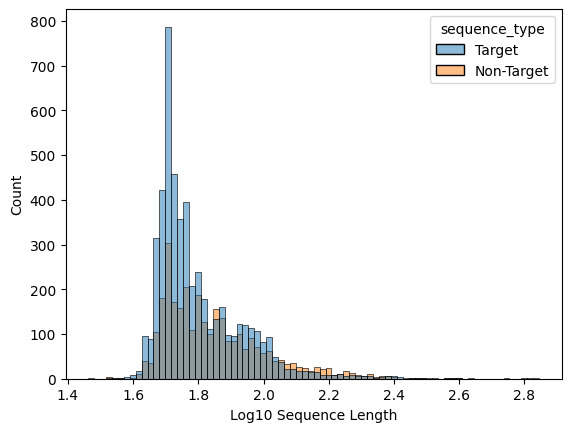

In [13]:
"""Are the length distribution of target sequences different from non-target sequences?"""

seq_lengths = sub1.select(
    pl.col("sequence_id", "sequence_counter", "sequence_type")
).group_by(
    pl.col("sequence_id", "sequence_type")
).agg(
    pl.col("sequence_id").count().alias("length")
).to_pandas()

sea.histplot(x=np.log10(seq_lengths["length"]), hue=seq_lengths["sequence_type"])
plt.xlabel("Log10 Sequence Length")
plt.ylabel("Count")
plt.show()

In [14]:
target_lengths    = seq_lengths[seq_lengths["sequence_type"] == "Target"]["length"]
nontarget_lengths = seq_lengths[seq_lengths["sequence_type"] == "Non-Target"]["length"]

u_stat, p_value = mannwhitneyu(
    target_lengths, 
    nontarget_lengths,
    alternative="less"   ## median target < median nontarget
)

print(f"Ho: Median lengths of target and non-target sequences are not differnet")
print(f"Ha: Median length of target is less than median length of non-target sequences")
print(f"U = {u_stat:.3f}, p = {p_value:.4f}")

Ho: Median lengths of target and non-target sequences are not differnet
Ha: Median length of target is less than median length of non-target sequences
U = 6157000.500, p = 0.0000


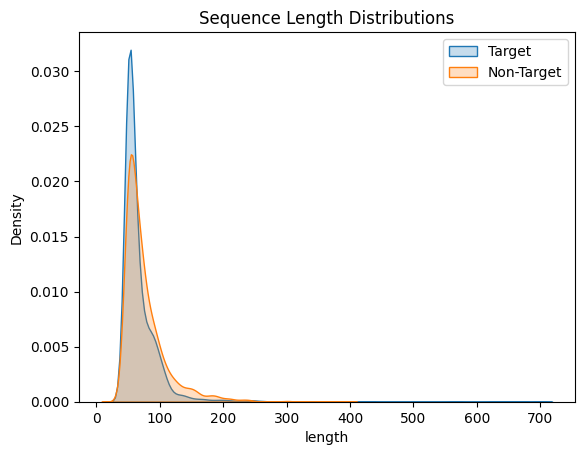

In [15]:
sea.kdeplot(x=target_lengths, label="Target", fill=True)
sea.kdeplot(nontarget_lengths, label="Non-Target", fill=True)
plt.title("Sequence Length Distributions")
plt.legend()
plt.show()

In [16]:
"""For each subject, what is the ratio of target/non-target sequences?"""

sub_seq_table = sub1.group_by(
    pl.col("subject", "sequence_id", "sequence_type")
).agg(
    pl.col("subject").count().alias("count")
).sort(
    by=("subject", "sequence_type")
).group_by(
    pl.col("subject", "sequence_type")
).agg(
    pl.col("subject").count().alias("count")
).sort(
    by=("subject", "sequence_type")
)


sub_seq_table = sub_seq_table.pivot(
    values="count",
    index="subject",
    columns="sequence_type"
).with_columns(
    (pl.col("Target")/pl.col("Non-Target")).alias("target_nonTarget_ratio")
)

ratio_counts = sub_seq_table.group_by(
    pl.col("target_nonTarget_ratio")
).agg(
    pl.col("target_nonTarget_ratio").count().alias("count")
).sort(by="count", descending=True)


outlier_ratios = sub_seq_table.filter(
    (pl.col("target_nonTarget_ratio") < 1.68) | 
    (pl.col("target_nonTarget_ratio") > 1.69)
)


print(sub_seq_table)
print(ratio_counts)
print(outlier_ratios)

shape: (81, 4)
┌─────────────┬────────────┬────────┬────────────────────────┐
│     subject ┆ Non-Target ┆ Target ┆ target_nonTarget_ratio │
╞═════════════╪════════════╪════════╪════════════════════════╡
│ SUBJ_000206 ┆         38 ┆     64 ┆               1.684211 │
│ SUBJ_001430 ┆         38 ┆     64 ┆               1.684211 │
│ SUBJ_002923 ┆         38 ┆     64 ┆               1.684211 │
│ SUBJ_003328 ┆         38 ┆     64 ┆               1.684211 │
│           … ┆          … ┆      … ┆                      … │
│ SUBJ_063346 ┆         38 ┆     64 ┆               1.684211 │
│ SUBJ_063447 ┆         38 ┆     64 ┆               1.684211 │
│ SUBJ_063464 ┆         38 ┆     64 ┆               1.684211 │
│ SUBJ_064387 ┆         38 ┆     64 ┆               1.684211 │
└─────────────┴────────────┴────────┴────────────────────────┘
shape: (5, 2)
┌────────────────────────┬───────┐
│ target_nonTarget_ratio ┆ count │
╞════════════════════════╪═══════╡
│               1.684211 ┆    77 │
│           

## Second Subset

In [17]:
sub2 = train.select(
    pl.col("^acc_.*$", "^rot_.*$", "^thm_.*$", "^tof_.*_v.*$")
)
sub2.head(4)

acc_x,acc_y,acc_z,rot_w,rot_x,rot_y,rot_z,…,tof_5_v57,tof_5_v58,tof_5_v59,tof_5_v60,tof_5_v61,tof_5_v62,tof_5_v63
6.683594,6.214844,3.355469,0.134399,-0.355164,-0.447327,-0.809753,…,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
6.949219,6.214844,3.125,0.143494,-0.340271,-0.42865,-0.824524,…,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
5.722656,5.410156,5.421875,0.219055,-0.274231,-0.356934,-0.865662,…,119.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
6.6015625,3.53125,6.457031,0.297546,-0.26416,-0.238159,-0.885986,…,111.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0


In [18]:
features_NA = sub2.select(
    pl.all().is_null().sum()
).unpivot(
    value_name="NA_count",
    variable_name="feature"
).filter(
    pl.col("NA_count")>0
).sort(
    by=("feature", "NA_count"),
    descending=True
).with_columns(
    (100*pl.col("NA_count")/len(sub2)).alias("NA_pct")
)

features_NA

feature,NA_count,NA_pct
"""tof_5_v9""",30142,5.242588
"""tof_5_v8""",30142,5.242588
"""tof_5_v7""",30142,5.242588
"""tof_5_v63""",30142,5.242588
…,…,…
"""rot_z""",3692,0.642148
"""rot_y""",3692,0.642148
"""rot_x""",3692,0.642148
"""rot_w""",3692,0.642148


In [19]:
sub2.select(
    pl.all().min()
).unpivot(
    value_name="min_value"
).sort(
    by="min_value"
)

variable,min_value
"""acc_z""",-42.855469
"""acc_x""",-34.585938
"""acc_y""",-24.402344
"""tof_1_v0""",-1.0
…,…
"""thm_3""",0.0
"""thm_2""",21.95882
"""thm_5""",22.045
"""thm_4""",22.375921


In [20]:
sub2 = sub2.with_columns(
    # Acceleration magnitude
    pl.fold(
        acc = pl.lit(0),
        function = lambda acc,x: acc + x**2,
        exprs = pl.col("^acc_.*$")
    ).sqrt().alias("acc_mag"),

    # Rotational angle (rad) from neutral position
    (2*np.arccos(pl.col("rot_w").clip(-1,1))).alias("rot_angle"),
    
    # Thermopile mean
    (pl.fold(
        acc = pl.lit(0),
        function = lambda acc,x: acc + x,
        exprs = pl.col("^thm_.*$")
     )/5).alias("thm_mean"),
    
    # Thermopile std
    pl.concat_list(["thm_1", "thm_2", "thm_3", "thm_4", "thm_5"]).list.std().alias("thm_std"),
    
    # Thermopile range: max - min
    (pl.concat_list(["thm_1", "thm_2", "thm_3", "thm_4", "thm_5"]).list.max() - \
     pl.concat_list(["thm_1", "thm_2", "thm_3", "thm_4", "thm_5"]).list.min()).alias("thm_range")
)

In [21]:
sensors_summaries = sub2.select(
    pl.col("acc_mag", "rot_angle", "thm_mean", "thm_std", "thm_range")
).drop_nulls().to_pandas()

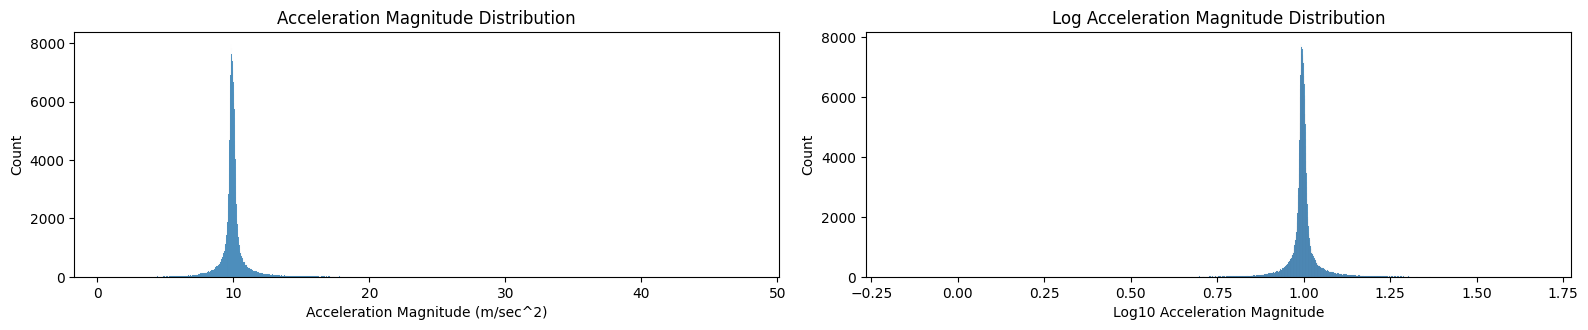

In [22]:
plt.figure(figsize=(16,6))

plt.subplot(221)
sea.histplot(x=sensors_summaries["acc_mag"])
plt.xlabel("Acceleration Magnitude (m/sec^2)")
plt.title("Acceleration Magnitude Distribution")

plt.subplot(222)
sea.histplot(x=np.log10(sensors_summaries["acc_mag"]))
plt.xlabel("Log10 Acceleration Magnitude")
plt.title("Log Acceleration Magnitude Distribution")

plt.tight_layout()
plt.show()

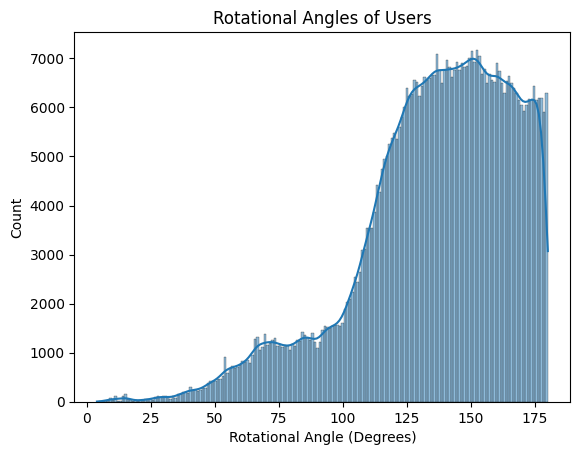

In [23]:
sea.histplot(x=sensors_summaries["rot_angle"]*180/np.pi, kde=True)
plt.xlabel("Rotational Angle (Degrees)")
plt.title("Rotational Angles of Users")
plt.show()

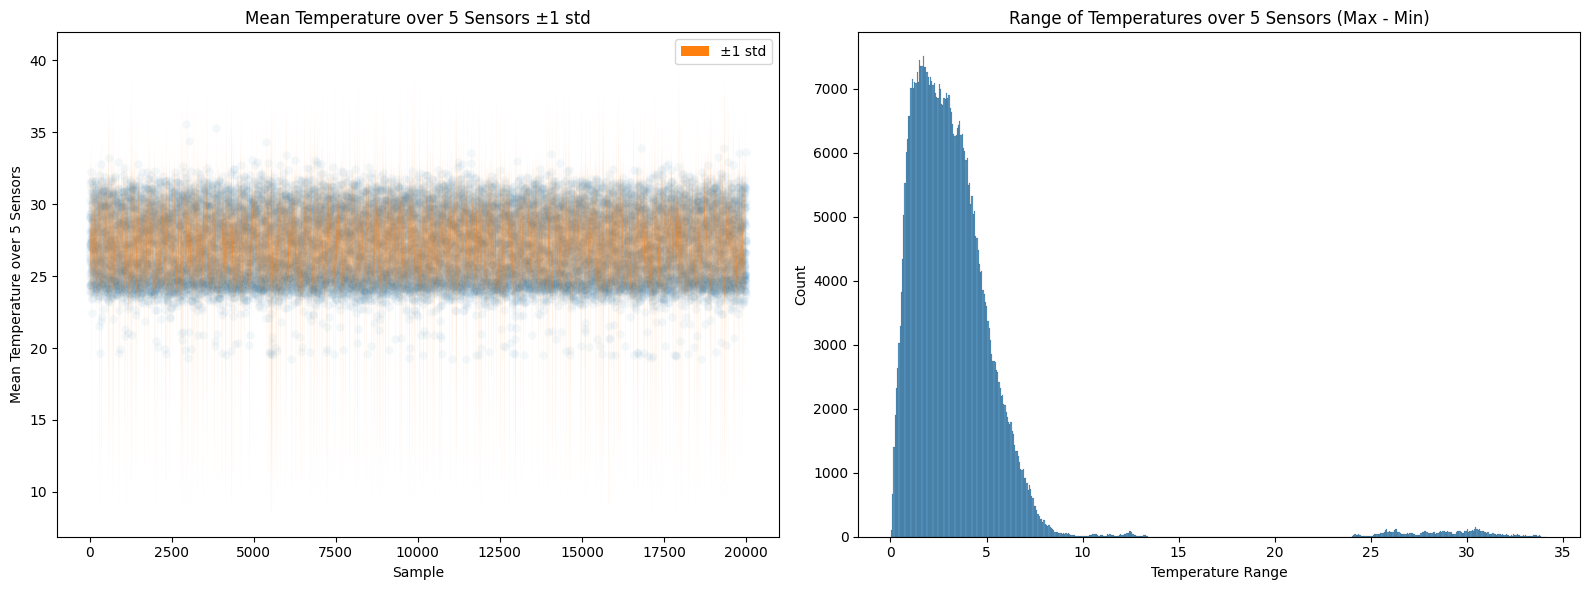

In [24]:
k = 20000
sample_mean = sensors_summaries["thm_mean"].sample(n=k, random_state=42)
sample_std  = sensors_summaries["thm_std"].sample(n=k, random_state=42)
x_range = np.arange(0, k)

plt.figure(figsize=(16, 6))
plt.subplot(121)
sea.scatterplot(x=x_range,
                y=sample_mean, 
                alpha=.05)

plt.fill_between(x=x_range,
                 y1=sample_mean - sample_std,
                 y2=sample_mean + sample_std,
                 alpha=1,
                 label="±1 std")
plt.title("Mean Temperature over 5 Sensors ±1 std")
plt.ylabel("Mean Temperature over 5 Sensors")
plt.xlabel("Sample")
plt.legend()

plt.subplot(122)
sea.histplot(x=sensors_summaries["thm_range"])
plt.title("Range of Temperatures over 5 Sensors (Max - Min)")
plt.xlabel("Temperature Range")


plt.tight_layout()
plt.show()

# Combined Analysis

In [25]:
train2 = train.with_columns(
    # Acceleration magnitude
    pl.fold(
        acc = pl.lit(0),
        function = lambda acc,x: acc + x**2,
        exprs = pl.col("^acc_.*$")
    ).sqrt().alias("acc_mag"),

    # Rotational angle (rad) from neutral position
    (2*np.arccos(pl.col("rot_w").clip(-1,1))).alias("rot_angle"),
    
    # Thermopile mean
    (pl.fold(
        acc = pl.lit(0),
        function = lambda acc,x: acc + x,
        exprs = pl.col("^thm_.*$")
     )/5).alias("thm_mean"),
    
    # Thermopile std
    pl.concat_list(["thm_1", "thm_2", "thm_3", "thm_4", "thm_5"]).list.std().alias("thm_std"),
    
    # Thermopile range: max - min
    (pl.concat_list(["thm_1", "thm_2", "thm_3", "thm_4", "thm_5"]).list.max() - \
     pl.concat_list(["thm_1", "thm_2", "thm_3", "thm_4", "thm_5"]).list.min()).alias("thm_range")
)

In [26]:
train2.group_by("sequence_type").agg(
    pl.col("acc_mag").median().alias("median_acc_mag"),
    pl.col("rot_angle").median().alias("median_rot_angle"),
    pl.col("thm_mean").median().alias("median_thm"),
    pl.col("thm_std").median().alias("median_thm_std"),
    pl.col("thm_range").median().alias("median_thm_range"),
).sort(by="sequence_type")

sequence_type,median_acc_mag,median_rot_angle,median_thm,median_thm_std,median_thm_range
"""Non-Target""",9.951806,2.400245,25.734526,0.957418,2.333382
"""Target""",9.914129,2.477607,27.839602,1.321342,3.27667


In [27]:
train2.group_by("sequence_type").agg(
    pl.col("acc_mag").mean().alias("mean_acc_mag"),
    pl.col("rot_angle").mean().alias("mean_rot_angle"),
    pl.col("thm_mean").mean().alias("mean_thm"),
    pl.col("thm_std").mean().alias("mean_thm_std"),
    pl.col("thm_range").mean().alias("mean_thm_range"),
).sort(by="sequence_type")

sequence_type,mean_acc_mag,mean_rot_angle,mean_thm,mean_thm_std,mean_thm_range
"""Non-Target""",10.109388,2.344389,26.236302,1.26279,3.046981
"""Target""",9.948853,2.388809,27.566683,1.570882,3.872603


In [28]:
train2.group_by(
    pl.col("sequence_type", "gesture")
).agg(
    pl.col("acc_mag").median().alias("median_acc_mag"),
    pl.col("rot_angle").median().alias("median_rot_angle"),
    pl.col("thm_mean").median().alias("median_thm"),
    pl.col("thm_std").median().alias("median_thm_std"),
    pl.col("thm_range").median().alias("median_thm_range"),
).sort(by="sequence_type").to_pandas()

,sequence_type,gesture,median_acc_mag,median_rot_angle,median_thm,median_thm_std,median_thm_range
0,Non-Target,Drink from bottle/cup,9.988777,2.544633,25.302473,1.248161,2.955847
1,Non-Target,Feel around in tray and pull out an object,9.972512,2.804674,25.112658,1.101568,2.671607
2,Non-Target,Wave hello,9.955893,2.356444,24.925555,0.699674,1.680103
3,Non-Target,Write name on leg,9.952726,2.438283,29.666020,1.062454,2.579281
4,Non-Target,Write name in air,9.915178,2.469790,24.989723,0.739849,1.789030
5,Non-Target,Text on phone,9.947382,2.229506,27.151506,1.211049,3.006874
6,Non-Target,Scratch knee/leg skin,9.971456,2.391200,29.417153,1.168583,2.819708
7,Non-Target,Pull air toward your face,9.916175,2.414500,24.849613,0.687193,1.661431
8,Non-Target,Pinch knee/leg skin,9.948501,2.439713,29.405482,1.128699,2.747749
9,Non-Target,Glasses on/off,10.018703,2.486123,26.663166,1.098797,2.764519


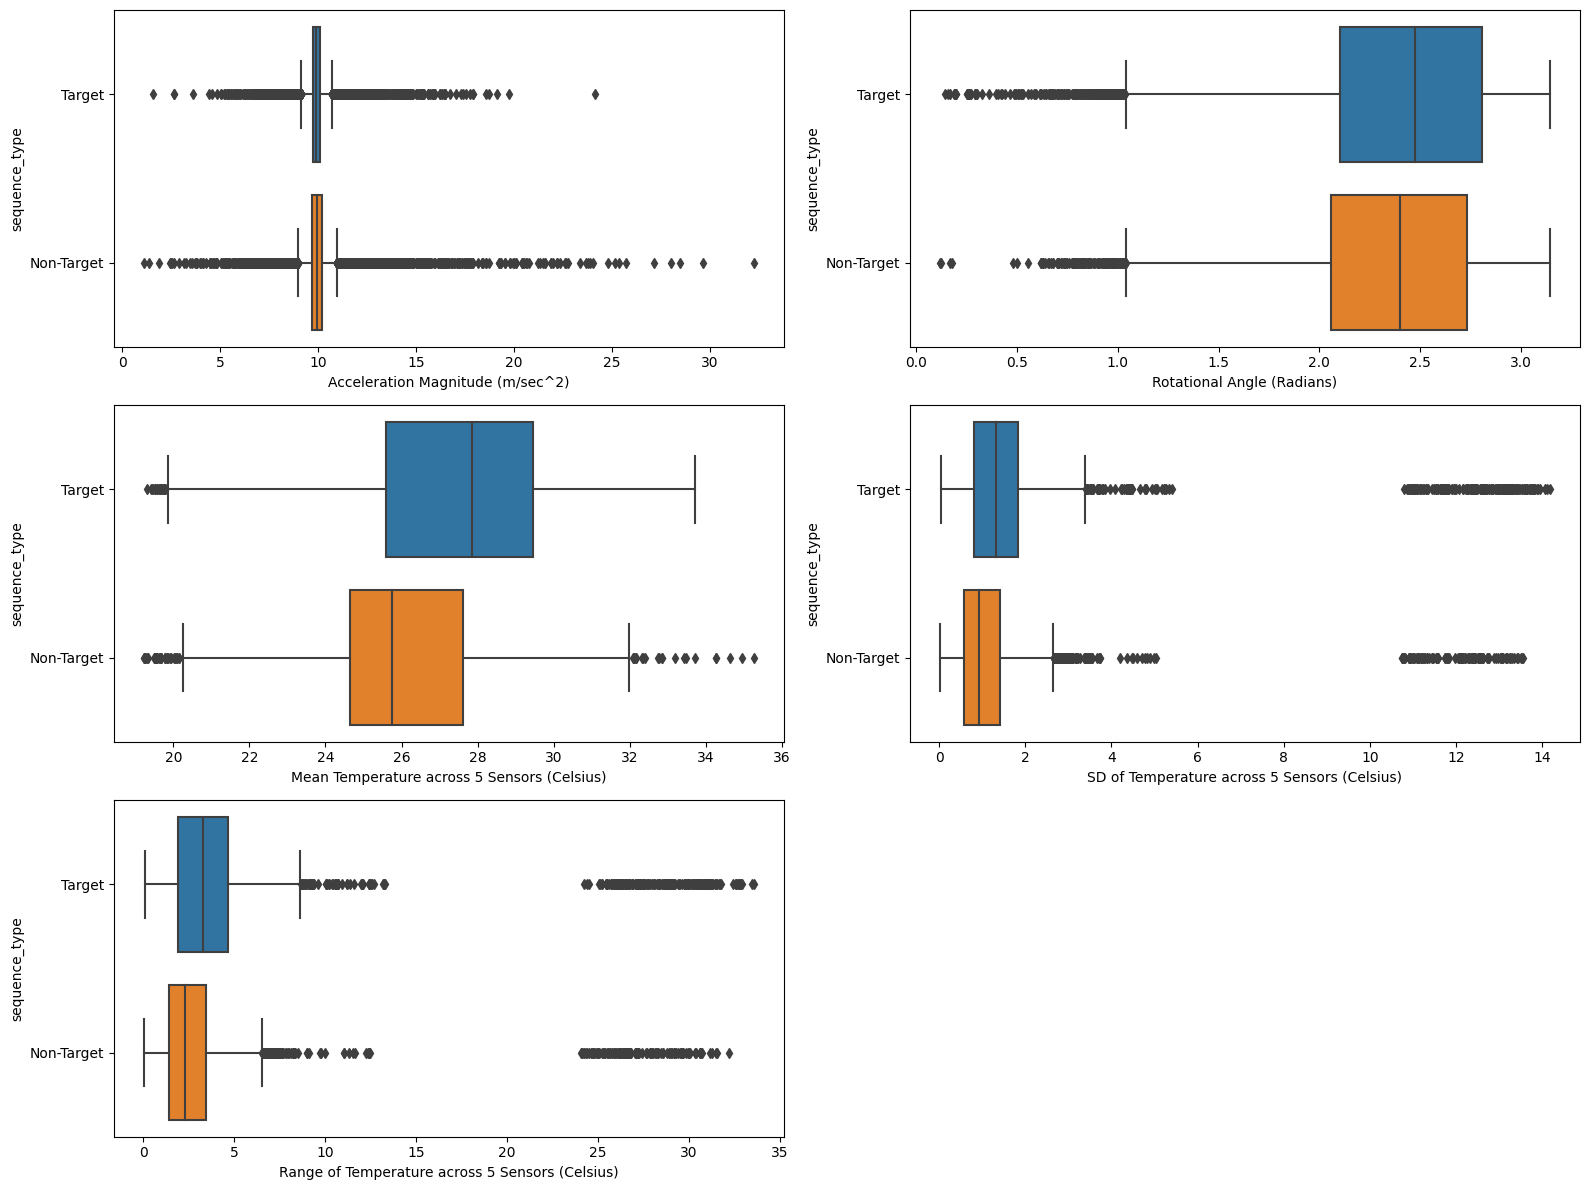

In [29]:
k = 20000
sequence_data = train2.select(
    pl.col("sequence_type", "acc_mag", "rot_angle", "thm_mean", "thm_std", "thm_range")
).to_pandas()
sampled_data = sequence_data.sample(n=k, random_state=42)



plt.figure(figsize=(16, 12))

plt.subplot(3,2,1)
sea.boxplot(
    data=sampled_data,
    x="acc_mag",
    y="sequence_type",
)
plt.xlabel("Acceleration Magnitude (m/sec^2)")

plt.subplot(3,2,2)
sea.boxplot(
    data=sampled_data,
    x="rot_angle",
    y="sequence_type",
)
plt.xlabel("Rotational Angle (Radians)")

plt.subplot(3,2,3)
sea.boxplot(
    data=sampled_data,
    x="thm_mean",
    y="sequence_type",
)
plt.xlabel("Mean Temperature across 5 Sensors (Celsius)")

plt.subplot(3,2,4)
sea.boxplot(
    data=sampled_data,
    x="thm_std",
    y="sequence_type",
)
plt.xlabel("SD of Temperature across 5 Sensors (Celsius)")

plt.subplot(3,2,5)
sea.boxplot(
    data=sampled_data,
    x="thm_range",
    y="sequence_type",
)
plt.xlabel("Range of Temperature across 5 Sensors (Celsius)")

plt.tight_layout()
plt.show()

In [30]:
k = 20000

phase_orientation_sensors = train2.select(
    pl.col("phase", "orientation", "behavior", "acc_mag", "rot_angle", "thm_mean", "thm_std", "thm_range")
).to_pandas()

sampled_data = phase_orientation_sensors.sample(n=k, random_state=42)

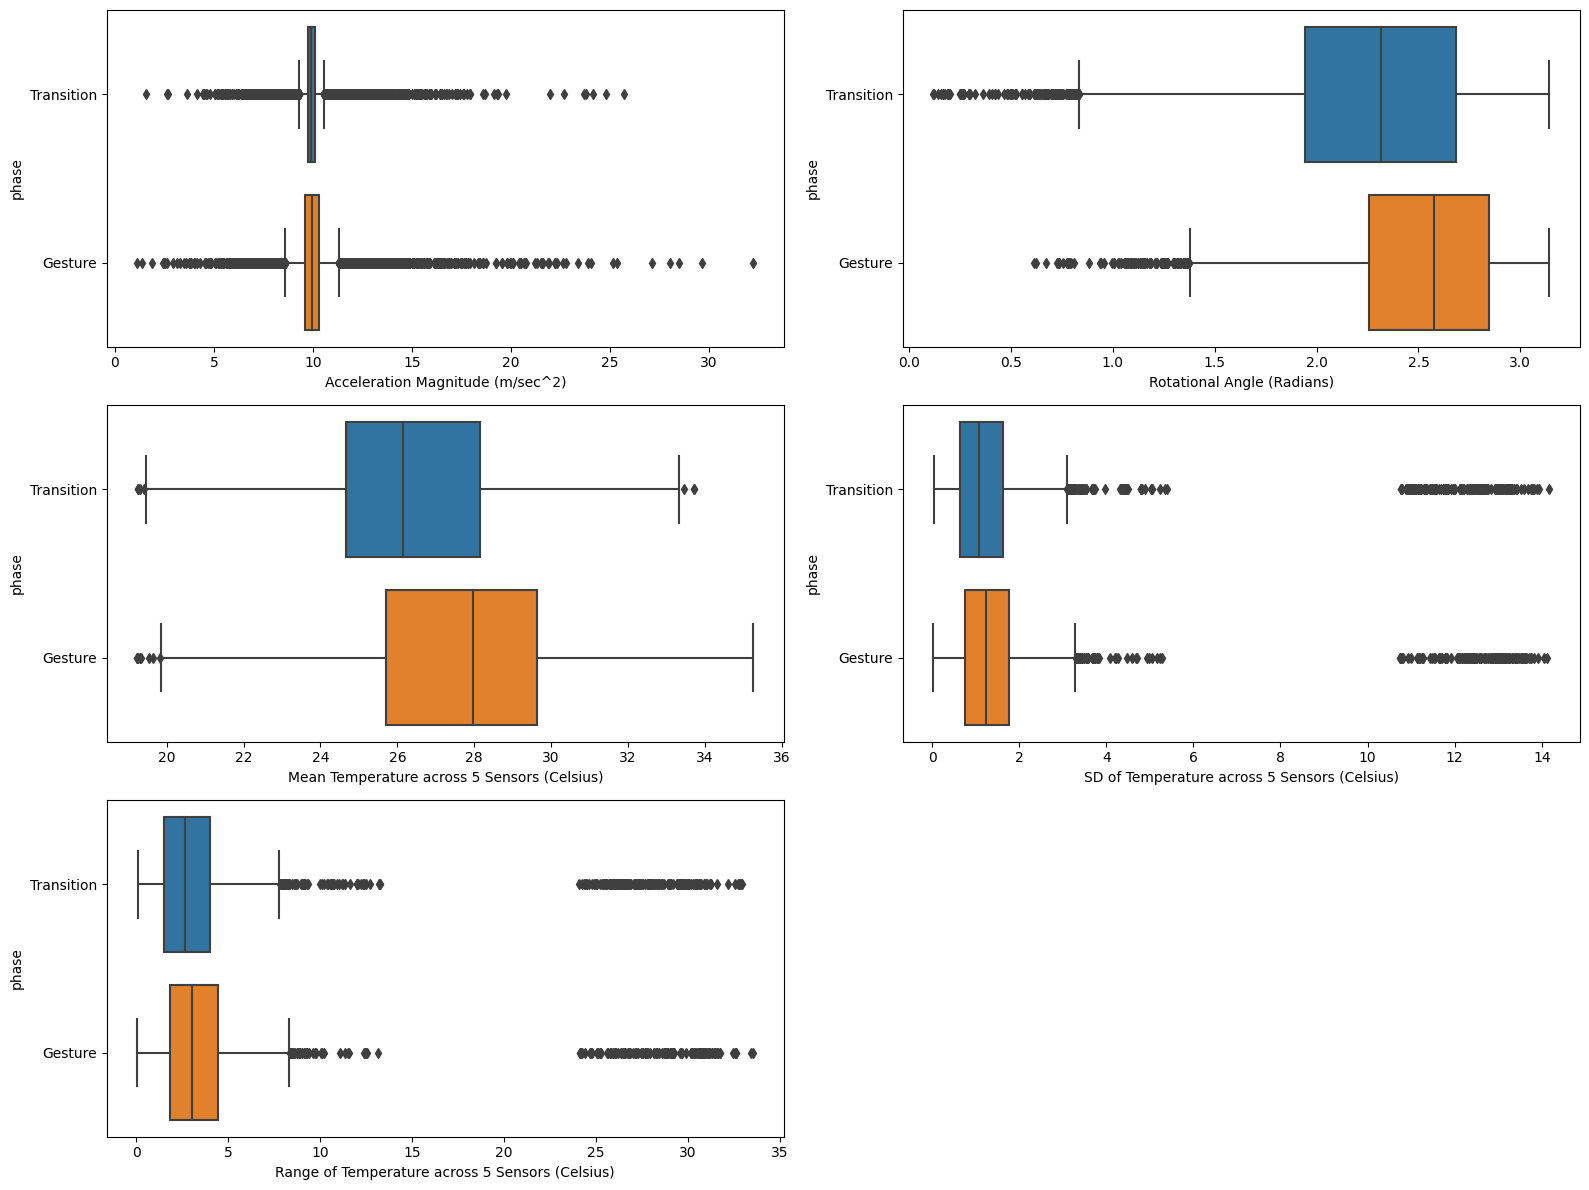

In [31]:
plt.figure(figsize=(16, 12))

plt.subplot(3,2,1)
sea.boxplot(
    data=sampled_data,
    x="acc_mag",
    y="phase",
)
plt.xlabel("Acceleration Magnitude (m/sec^2)")

plt.subplot(3,2,2)
sea.boxplot(
    data=sampled_data,
    x="rot_angle",
    y="phase",
)
plt.xlabel("Rotational Angle (Radians)")

plt.subplot(3,2,3)
sea.boxplot(
    data=sampled_data,
    x="thm_mean",
    y="phase",
)
plt.xlabel("Mean Temperature across 5 Sensors (Celsius)")

plt.subplot(3,2,4)
sea.boxplot(
    data=sampled_data,
    x="thm_std",
    y="phase",
)
plt.xlabel("SD of Temperature across 5 Sensors (Celsius)")

plt.subplot(3,2,5)
sea.boxplot(
    data=sampled_data,
    x="thm_range",
    y="phase",
)
plt.xlabel("Range of Temperature across 5 Sensors (Celsius)")

plt.tight_layout()
plt.show()

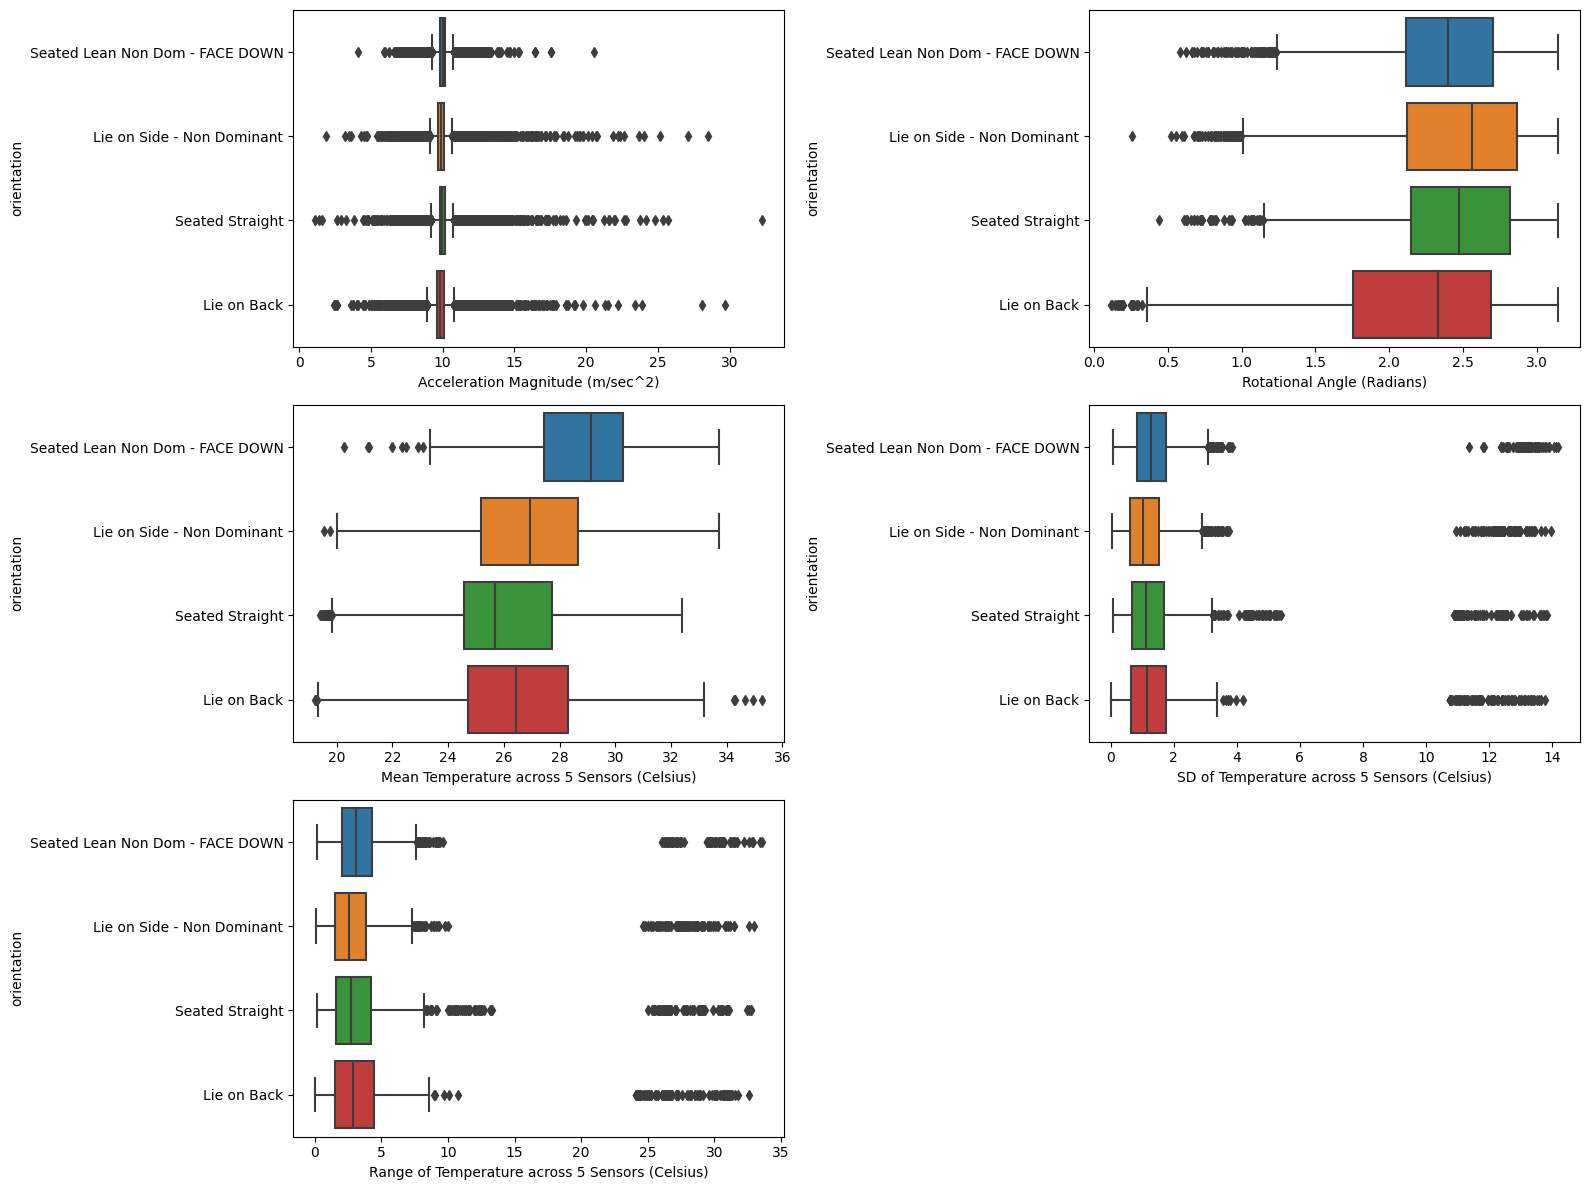

In [32]:
plt.figure(figsize=(16, 12))

plt.subplot(3,2,1)
sea.boxplot(
    data=sampled_data,
    x="acc_mag",
    y="orientation",
)
plt.xlabel("Acceleration Magnitude (m/sec^2)")

plt.subplot(3,2,2)
sea.boxplot(
    data=sampled_data,
    x="rot_angle",
    y="orientation",
)
plt.xlabel("Rotational Angle (Radians)")

plt.subplot(3,2,3)
sea.boxplot(
    data=sampled_data,
    x="thm_mean",
    y="orientation",
)
plt.xlabel("Mean Temperature across 5 Sensors (Celsius)")

plt.subplot(3,2,4)
sea.boxplot(
    data=sampled_data,
    x="thm_std",
    y="orientation",
)
plt.xlabel("SD of Temperature across 5 Sensors (Celsius)")

plt.subplot(3,2,5)
sea.boxplot(
    data=sampled_data,
    x="thm_range",
    y="orientation",
)
plt.xlabel("Range of Temperature across 5 Sensors (Celsius)")

plt.tight_layout()
plt.show()

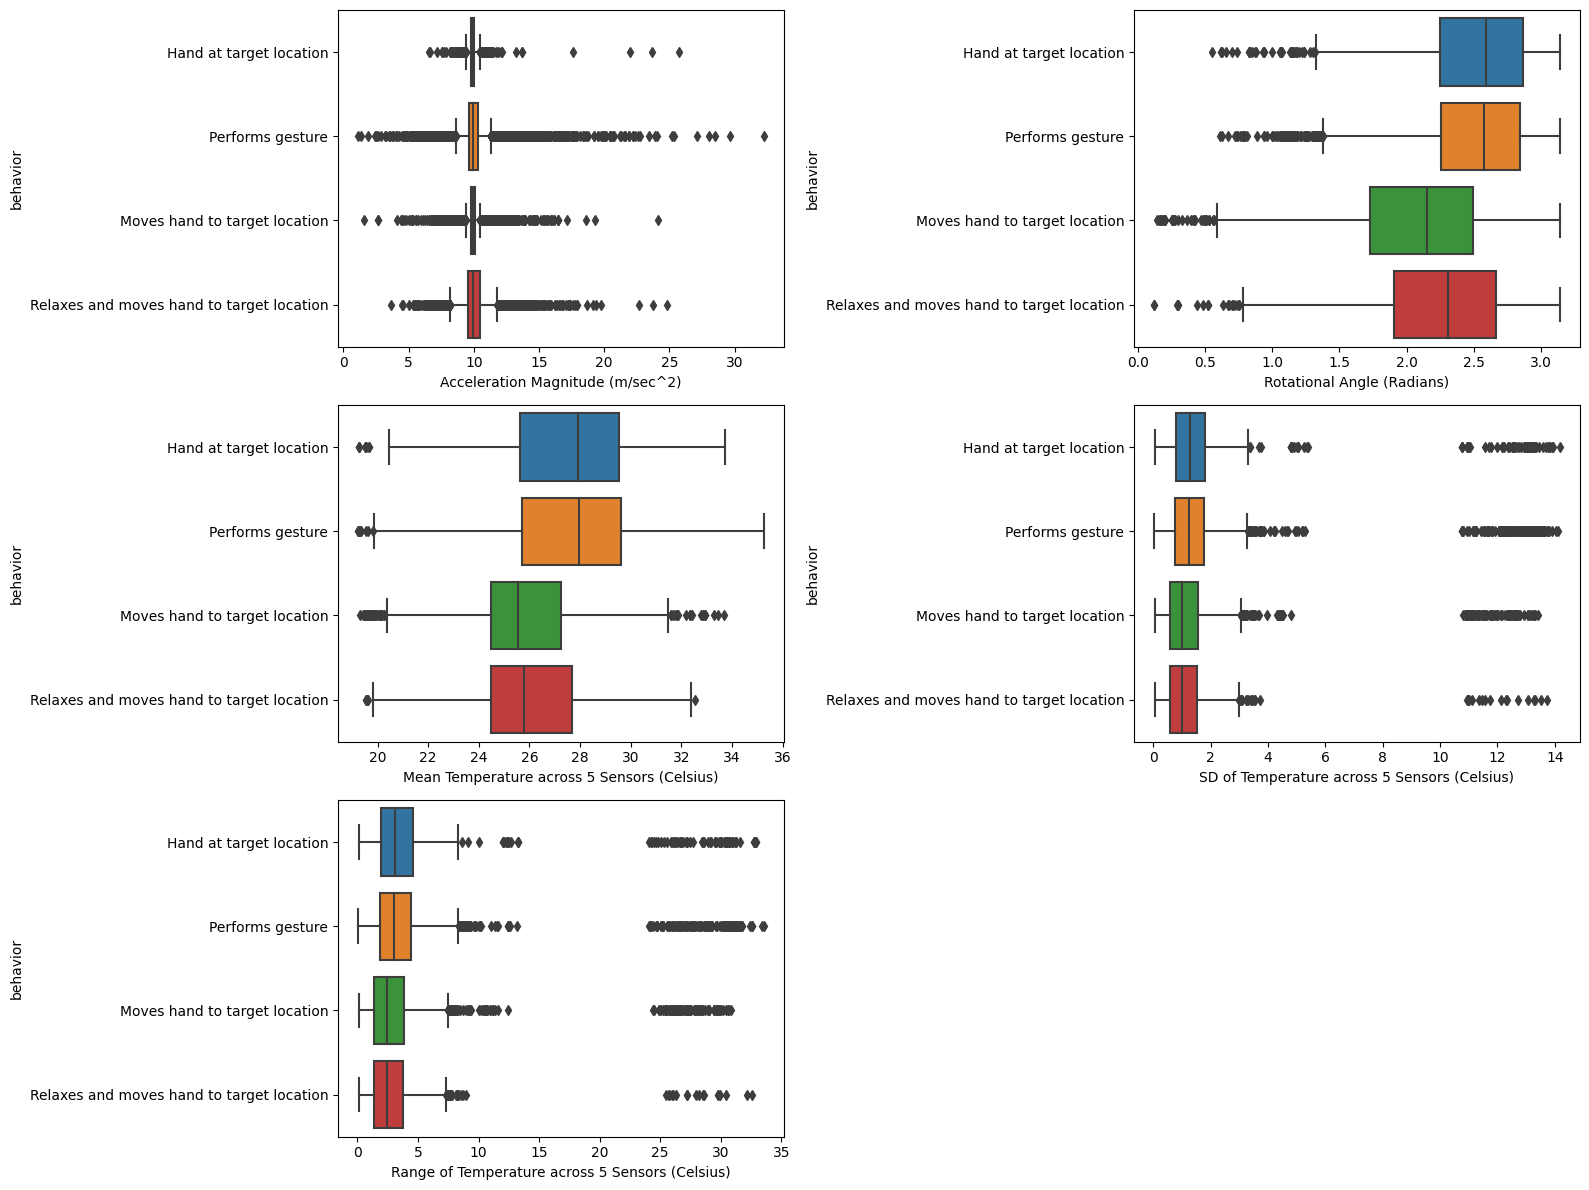

In [33]:
plt.figure(figsize=(16, 12))

plt.subplot(3,2,1)
sea.boxplot(
    data=sampled_data,
    x="acc_mag",
    y="behavior",
)
plt.xlabel("Acceleration Magnitude (m/sec^2)")

plt.subplot(3,2,2)
sea.boxplot(
    data=sampled_data,
    x="rot_angle",
    y="behavior",
)
plt.xlabel("Rotational Angle (Radians)")

plt.subplot(3,2,3)
sea.boxplot(
    data=sampled_data,
    x="thm_mean",
    y="behavior",
)
plt.xlabel("Mean Temperature across 5 Sensors (Celsius)")

plt.subplot(3,2,4)
sea.boxplot(
    data=sampled_data,
    x="thm_std",
    y="behavior",
)
plt.xlabel("SD of Temperature across 5 Sensors (Celsius)")

plt.subplot(3,2,5)
sea.boxplot(
    data=sampled_data,
    x="thm_range",
    y="behavior",
)
plt.xlabel("Range of Temperature across 5 Sensors (Celsius)")

plt.tight_layout()
plt.show()